In [10]:
# Rafael Augusto Gaseta França - 1421436
# Pedro Ferreira Alves Pinto - 1320981

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                 sep=';')

X = df.iloc[:, :-1].values
Y = df.iloc[:,-1].values

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
sorted(df.quality.unique())

[3, 4, 5, 6, 7, 8]

# MDS

In [4]:
import scipy.spatial.distance
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

D = pdist(X, metric='euclidean')
D = squareform(D)

mds = MDS(n_components=2, dissimilarity='precomputed')
mds_x = mds.fit_transform(D)

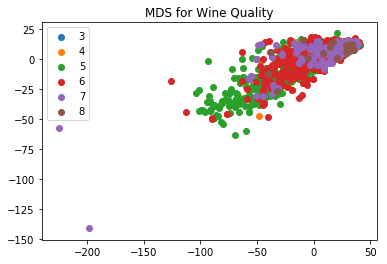

In [5]:
for i in sorted(df.quality.unique()):
    plt.scatter(x=mds_x[Y==i, 0], y=mds_x[Y==i, 1], label=i)
    
plt.legend()
plt.title("MDS for Wine Quality")
plt.show()

# PCA

In [6]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)

pca_x

array([[-13.22490501,  -2.02389981],
       [ 22.03772361,   4.40832155],
       [  7.16267333,  -2.50146086],
       ...,
       [ -3.43135351,  14.27124349],
       [  1.13287834,  16.31616732],
       [ -3.8743766 ,   3.12634754]])

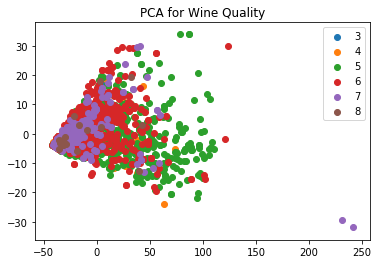

In [7]:
for i in sorted(df.quality.unique()):
    plt.scatter(x=pca_x[Y==i, 0], y=pca_x[Y==i, 1], label=i)
    
plt.legend()
plt.title("PCA for Wine Quality")
plt.show()

Ambos os graficos permitem uma visualizacao razoavel da separacao dos vinhos de qualidade 5,6,7 e 8. A visualizacao oferecida pela reducao da dimensionalidade pelo MDS se mostra menos dispersa e de melhor qualidade para a analise visual dos dados.

# Grid

In [8]:
import seaborn as sns

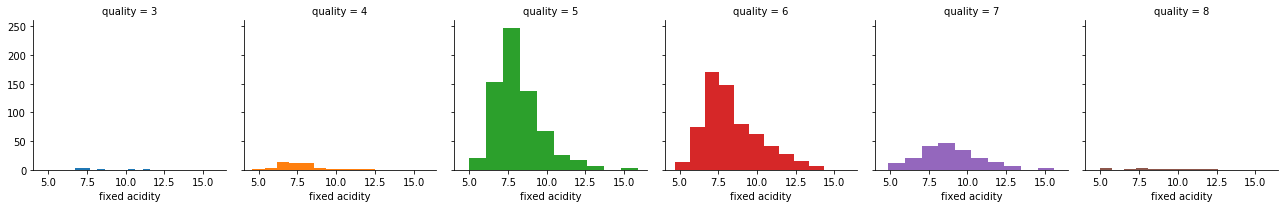

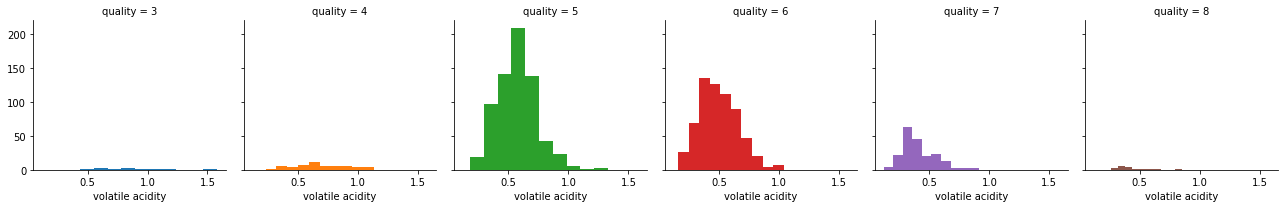

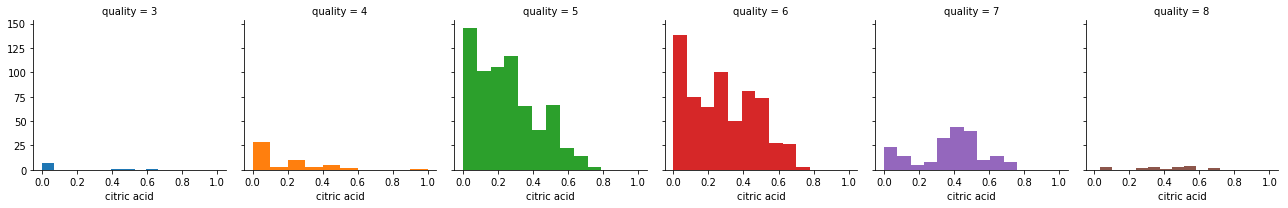

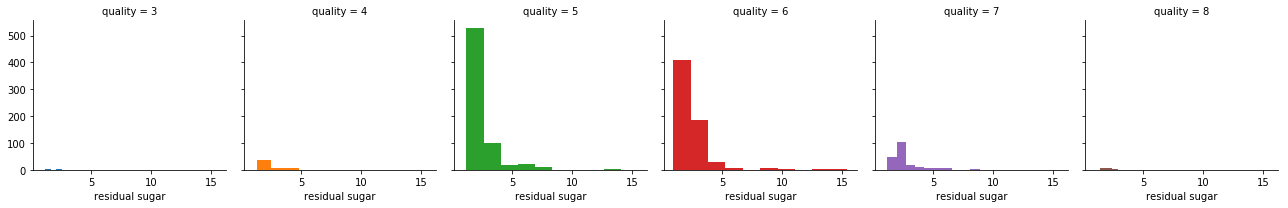

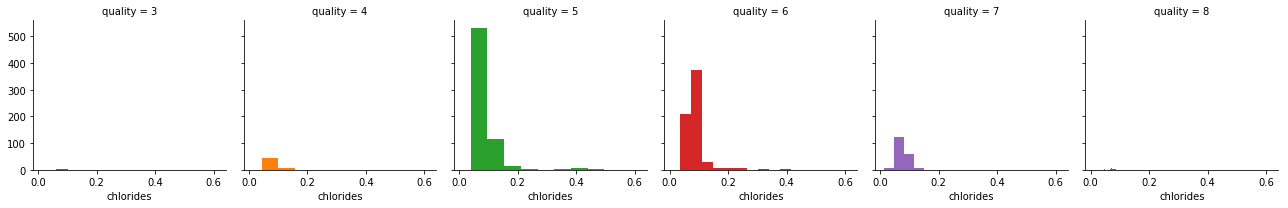

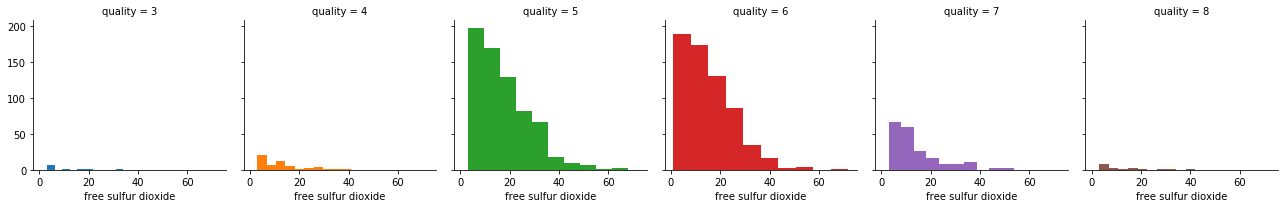

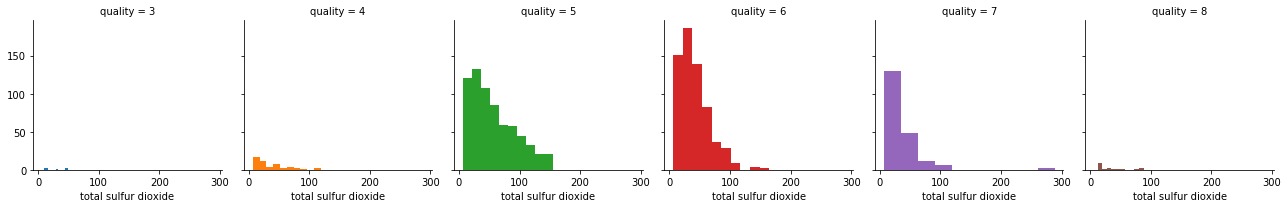

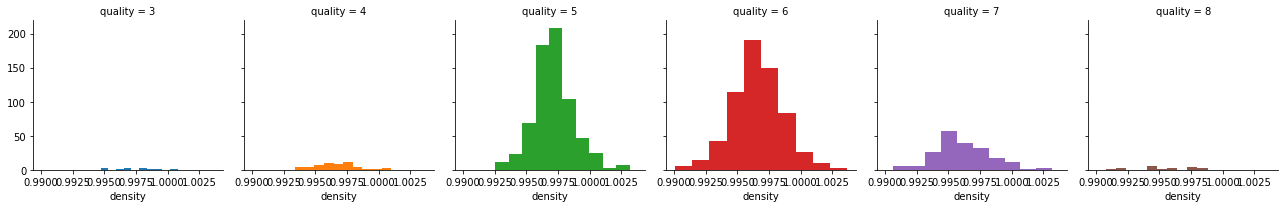

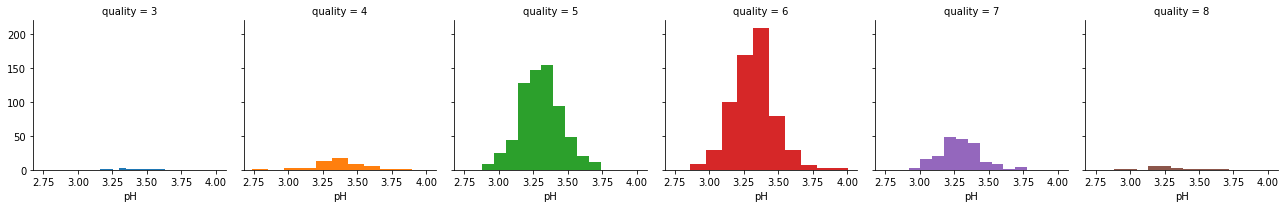

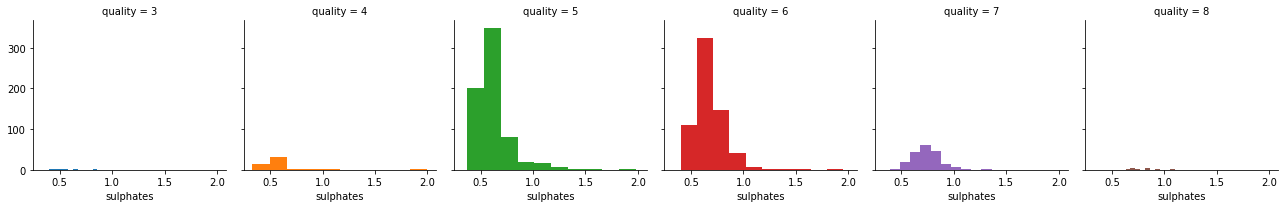

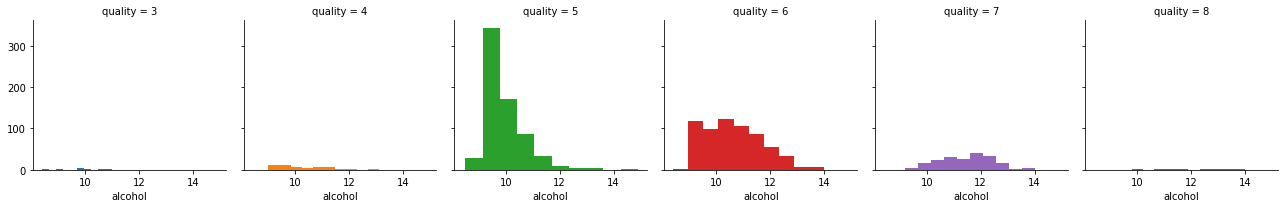

In [9]:
for name in df.columns[:-1]:
    g = sns.FacetGrid(df, col = "quality", hue="quality")
    g = g.map(plt.hist, name)